# Сборный проект

Исследование производится для интернет-магазина «Стримчик». Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цели исследования:**

Определить:
* Какие платформы лидируют по продажам;
* Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
* Какие жанры являются самыми прибыльными;
* Самые популярные платформы (топ-5);
* Самые популярные жанры (топ-5);
* Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Проверить гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Ход исследования**

Входные данные — из открытых источников взяты исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. 
Перед проверкой гипотез понадобится обзор данных.
Проверим данные на ошибки и оценим их влияние на исследование. На этапе предобработки постараемся исправить самые критичные ошибки данных.

Для ответа на гипотезы посчитаем и добавим в таблицу следующие данные:
* суммарные продажи во всех регионах.

Таким образом, исследование пройдёт в четыре этапа:
* Обзор данных;
* Предобработка данных;
* Исследовательский анализ данных;
* Составление портрета пользователя каждого региона;
* Проверка гипотез.

## Обзор данных

Для первого знакомства с данными импортируем библиотеку `pandas` и сохраним предоставленный файл в переменной `df`.

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
import seaborn as sns # импорт библиотеки seaborn
from scipy import stats as st  # импорт библиотеки scipy
import numpy as np # импорт библиотеки numpy

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

In [2]:
df = pd.read_csv('/datasets/games.csv')  # чтение файла с данными и сохранение в df
pd.set_option('display.max_columns', None)
df.head() # получение первых 5 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Получим общую информацию о таблице методом `info()`.

In [3]:
df.info()  # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16715 строк, 11 столбцов. Встречаются разные типы данных: `float64`, `object`. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Согласно документации к данным:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

Названия колонок записаны с нарушением стиля.

### Вывод

В каждой строке таблицы - информация о выпущенной игре: год выпуска, платформа, на которой вышла игра, жанр, продажи в трех регионах, оценки критиков и пользователей.

Предварительно можно утверждать, что, данных достаточно для проверки гипотез. Но встречаются пропуски в данных, а в названиях колонок — расхождения с хорошим стилем.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Подготовка данных

### Стиль заголовков

Выведем на экран названия столбцов:

In [4]:
df.columns # перечень названий столбцов таблицы

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия всех столбцов записаны с нарушением стиля. Приведем заголовки к "змеиному" регистру. Используем метод `str.lower()`преобразуем символы в названии колонок в нижний регистр.

In [5]:
df.columns = df.columns.str.lower() # применение метода str.lower()

In [6]:
df.head() # получение первых 5 строк таблицы df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Преобразование выполнено успешно.

### Изменение типов данных

Столбец `user_score` содержит информацию об оценках пользователей по десятибальной системе, при этом тип данных в столбце - `object`. Переведем данные в числовое значение методом `to_numeric`.

In [7]:
df["user_score"] = pd.to_numeric(df["user_score"], errors='coerce') # перевод строковых значений в числа

In [8]:
df["user_score"].dtype # определение типа данных

dtype('float64')

Тип данных в столбце `user_score` изменен на `float64`.

### Обработка пропусков

Подсчитаем пропуски в таблице.

In [9]:
(df.isna().mean()*100).round(1) # подсчет пропущенных значений 

name                0.0
platform            0.0
year_of_release     1.6
genre               0.0
na_sales            0.0
eu_sales            0.0
jp_sales            0.0
other_sales         0.0
critic_score       51.3
user_score         54.6
rating             40.5
dtype: float64

Пропуски в столбце `year_of_release` составляют `1,6%`. Замена средним значением в данном случае может исказить результаты исследования. Оставим в этом столбце пропуски.

В колонках `critic_score`, `user_score`, `rating` не заполнено практически 50% значений. Если заменить данные в этих столбцах средним значением, это может исказить имеющуюся информацию, и усреднить рейтинг по половине представленных игр. Не будем обрабатывать пропуски и в этих столбцах.

Пропуски в графе `rating` заменим значением `'no_rating'`, это позволит использовать эти данные при ответе на вопрос о влиянии рейтинга на продажи игр.

In [10]:
df['rating'] = df['rating'].fillna('no_rating') # замена пропущенных значений
df['rating'].isna().sum() #подсчет пропусков

0

### Удаление дубликатов 

In [11]:
df.duplicated().sum() # проверка на отсутствие явных дубликатов

0

Явные дубликаты отсутствуют.

### Добавление столбца 'total_sales'

Чтобы подсчитать общие продажи по всем регионам, создадим столбец `total_sales`.

In [12]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # подсчет общих продаж и запись 
                                                                                         # результата в столбцец total_sales

In [13]:
df.head() # получение первых 5 строк таблицы df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38


Столбец `total_sales` добавлен в таблицу `df`.

### Проверка данных на аномалии и исправления 

Просмотрим содержимое каждого столбца.

In [14]:
list(set(df['name'])) # просмотр уникальных значений столбца 'name'

['Trick DS-han: Kakushi Kami no Sumukan',
 'Warriors of the Lost Empire (JP sales)',
 'Army of Two',
 'Dragon Ball GT: Final Bout',
 'Style Lab: Jewelry Design',
 "Nobunaga's Ambition (3DS)",
 'Rayman DS',
 'Mario & Luigi: Partners in Time',
 'Prince of Persia: The Sands of Time',
 'Devil May Cry 2',
 'Call of Duty: World at War',
 'RPG Maker 3',
 "Herc's Adventures",
 'Jewel Master: Cradle Of Rome 2',
 'Prison Architect',
 'BlazBlue: Calamity Trigger Portable',
 'Sakura Wars 4: Koi Seyo,Otome',
 'CrossworDS',
 'Sing4: The Hits Edition',
 'Invasion From Beyond',
 'WCW Nitro',
 'Hannspree Ten Kate Honda: SBK Superbike World Championship',
 'Sonic X: Game Boy Advance Video Volume 1',
 'Killzone: Mercenary',
 'Scooby-Doo! Unmasked',
 'Doshin the Giant',
 'Super Football',
 'Front Mission Evolved',
 'Sleepover Party',
 'FIFA 2000',
 "SingStar '80s",
 'Nobunaga no Yabou: Haouden',
 'SNK vs. Capcom Card Fighters DS',
 'Monster High: Ghoul Spirit',
 'Marie no Atelier: Salburg no Renkinjutsush

In [15]:
df['platform'].sort_values().unique() # просмотр уникальных значений столбца 'platform'

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [16]:
df['year_of_release'].sort_values().unique() # просмотр уникальных значений столбца 'year_of_release'

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [17]:
df['genre'].sort_values().unique() # просмотр уникальных значений столбца 'genre'

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy', nan], dtype=object)

Text(0.5, 1.0, 'Гистограмма распределения в графе "critic_score"')

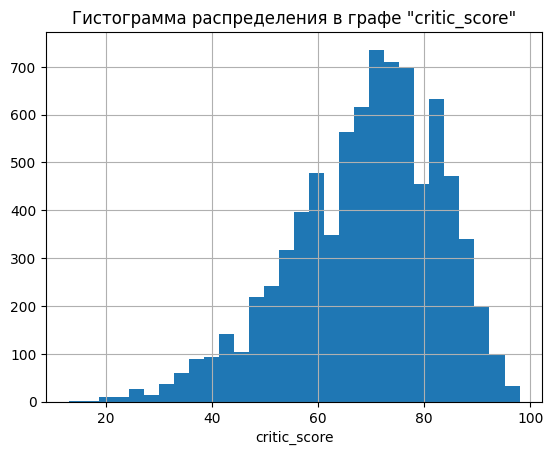

In [18]:
#df['critic_score'].hist() # построение гистограммы
fig, ax = plt.subplots()
plt.hist(df['critic_score'], bins=30)
ax.grid()
ax.set_xlabel('critic_score')
ax.set_title('Гистограмма распределения в графе "critic_score"')

In [19]:
df['critic_score'].sort_values().unique() # просмотр уникальных значений столбца 'critic_score'

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

In [20]:
df['user_score'].sort_values().unique() # просмотр уникальных значений столбца 'user_score'

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

In [21]:
df['rating'].value_counts() # просмотр уникальных значений столбца 'rating' 

no_rating    6766
E            3990
T            2961
M            1563
E10+         1420
EC              8
K-A             3
RP              3
AO              1
Name: rating, dtype: int64

Рейтинг от организации ESRB (англ. Entertainment Software Rating
Board) присваивается компьютерным играм в зависимости от подходящей возрастной категории:
* «EC» («Early childhood») — «Для детей младшего возраста»:
* «E» («Everyone») — «Для всех»
* «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
* «T» («Teen») — «Подросткам»
* «M» («Mature») — «Для взрослых»
* «AO» («Adults Only 18+») — «Только для взрослых»
* «RP» («Rating Pending») — «Рейтинг ожидается»
* «K-A» («Kids to Adults»)— «Для детей и взрослых». Этот рейтинг был заменён на «Everyone» 1 января 1998 года и может встречаться только в играх, изданных ранее.

Заменим рейтинг на `K-A` на `Е`, т.к.эти рейтинги относятся к одной возрастной категории, рейтинг `K-A` не используется с 1998 года.

In [22]:
df['rating'] = df['rating'].replace('K-A', 'E') # замена значения методом replace()

<Axes: title={'center': 'Распределение игр по рейтингу ESRB'}>

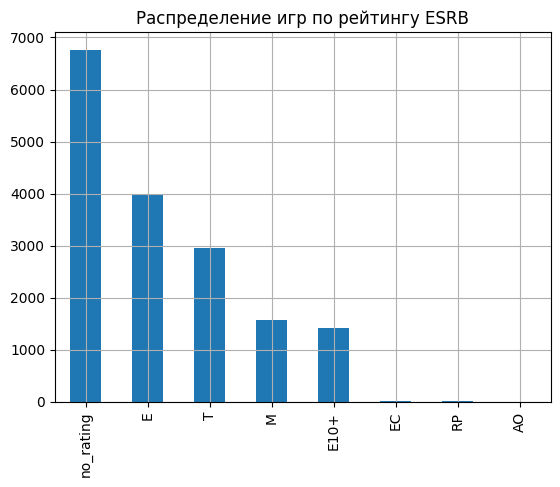

In [23]:
#df['rating'].hist() # построение гистограммы
df['rating'].value_counts().plot(kind='bar', title='Распределение игр по рейтингу ESRB', grid=True)

<Axes: >

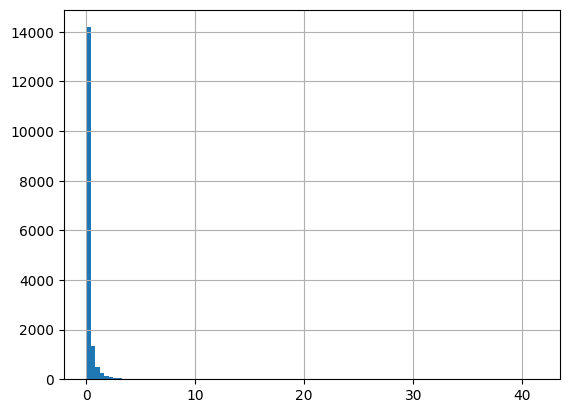

In [24]:
df['na_sales'].hist(bins=100) # построение гистограммы

<Axes: >

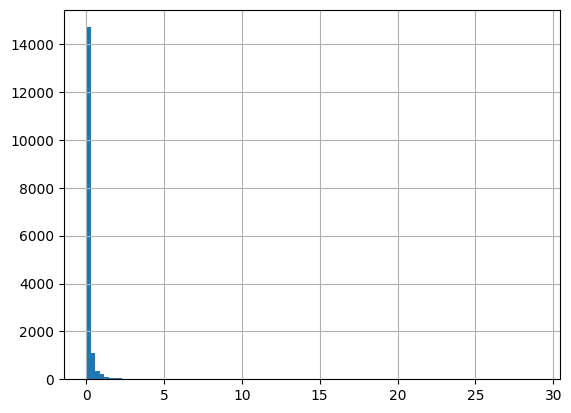

In [25]:
df['eu_sales'].hist(bins=100) # построение гистограммы

<Axes: >

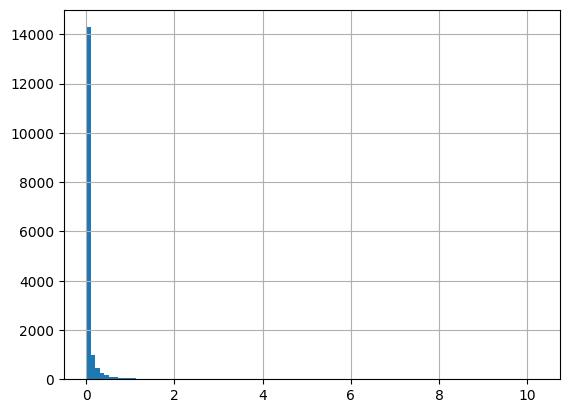

In [26]:
df['jp_sales'].hist(bins=100) # построение гистограммы

<Axes: >

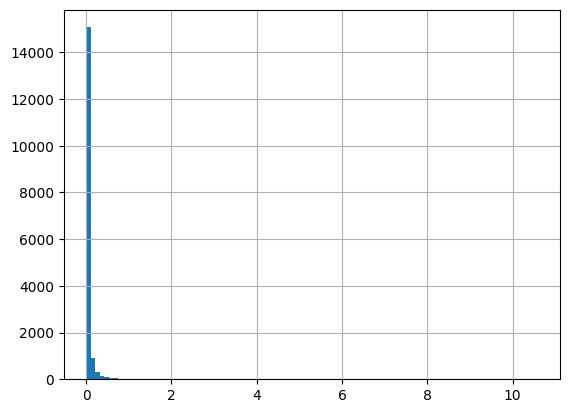

In [27]:
df['other_sales'].hist(bins=100) # построение гистограммы

## Исследовательский анализ данных

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Для этого построим гистограмму столбца `year_of_release`.

<Axes: >

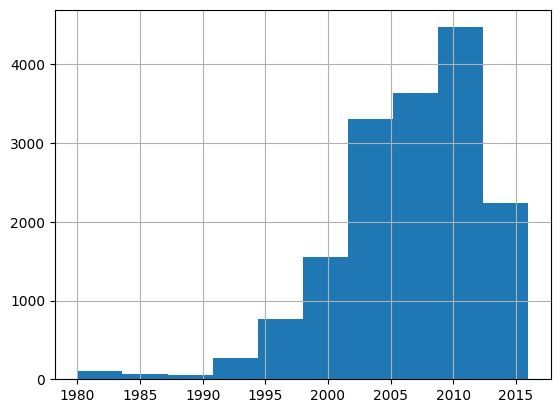

In [28]:
df['year_of_release'].hist() # построение гистограммы

<Axes: xlabel='year_of_release'>

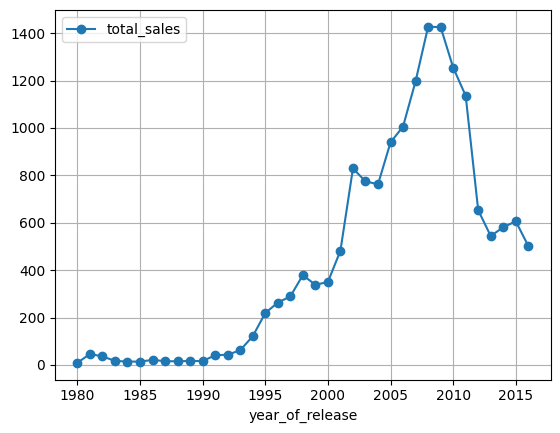

In [29]:
df.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(style='o-', grid=True) # построение графика

Начиная с 2000 года мы видим резкий рост числа выпускаемых игр. Но после пика в 2010 году, началось снижение.

На данном этапе можно отбросить игры выпущенные до 2000 года. Для дальнейшей работы поместим срез по играм, выпущенным после 2000 года, в переменную `df_actual`.

<Axes: xlabel='year_of_release'>

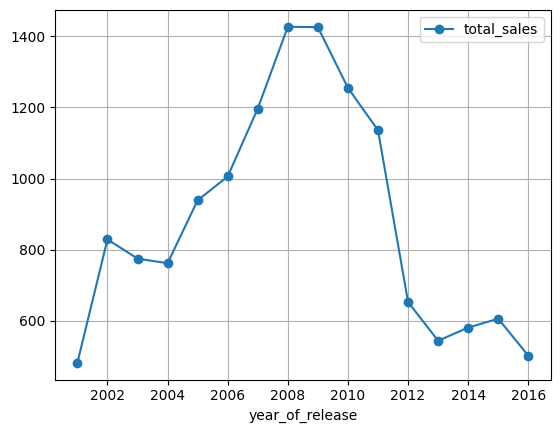

In [30]:
df_actual = df.query('year_of_release > 2000') # срез по дате выпуска игр и запись результата в переменную

# построение графика
df_actual.pivot_table(index='year_of_release', values='total_sales', aggfunc='count').plot(style='o-', grid=True) 

### Выпуски игр по платформам

Определим платформы с наибольшими суммарными продажами. Для этого построим сводную таблицу.

In [31]:
# сводная таблица
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1194.39
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.81
PSP,289.53
3DS,257.81


<Axes: xlabel='platform'>

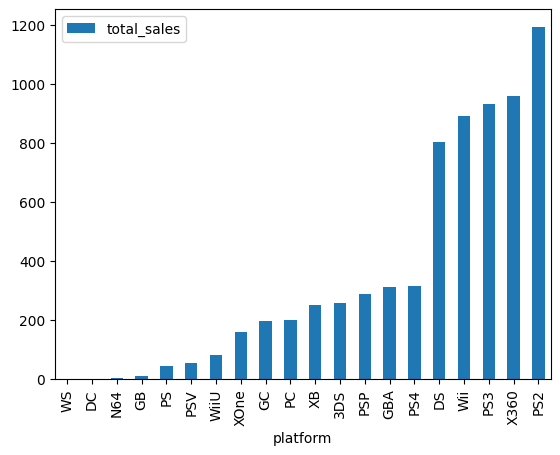

In [32]:
# построение графика из сводной таблицы
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='bar')

Наибольшие продажи имеют 5 платформ: `PS2`, `X360`, `PS3`, `Wii`, `DS`. Однако это данные за 16 лет. Рассмотрим как распределились во времени продажи по 15 наиболее популярным платформам.

В новую переменную `df_actual_top_15` поместим информацию о 15 платформах с наибольшими продажами после 2000 года. Выведем ее на экран.

In [33]:
# создание новой таблицы по 15 наиболее популярным платформам после 2000 года
df_actual_top_15 = df_actual[df_actual['platform']
                            .isin(df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values(by='total_sales', ascending=False).head(15).index)
                            ]
df_actual_top_15

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


Посмотрим на графике как распределились по годам продажи на этих платформах.

<Axes: xlabel='year_of_release'>

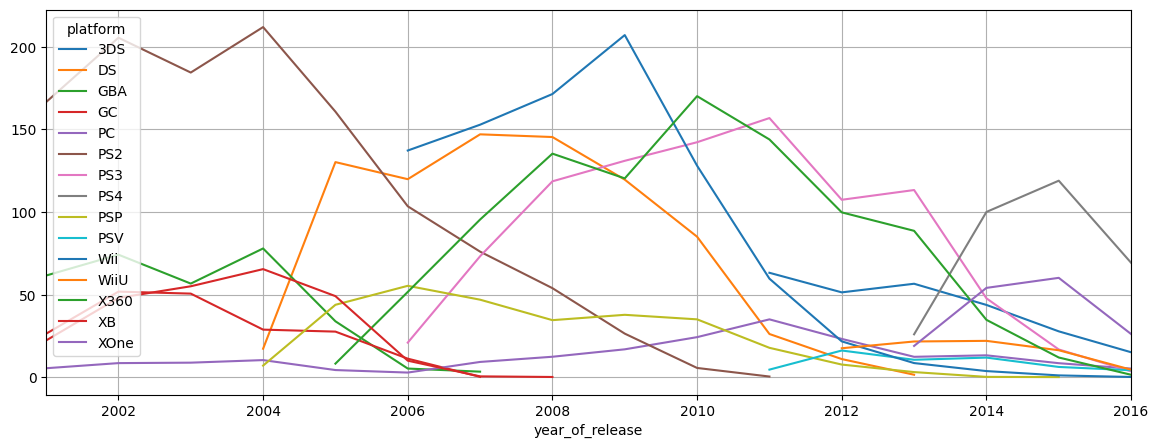

In [34]:
# создание сводной таблицы
ab=df_actual_top_15.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
# построение графика
ab.plot(style='-', xlim=(2001, 2016), figsize=(14, 5), grid=True)

In [35]:
df_pivot = df_actual_top_15.pivot_table(index='platform',values='year_of_release',  aggfunc=('min', 'max')) # построение сводной таблицы
df_pivot['duration'] = df_pivot['max'] - df_pivot['min']
df_pivot

,max,min,duration
platform,,,
3DS,2016.0,2011.0,5.0
DS,2013.0,2004.0,9.0
GBA,2007.0,2001.0,6.0
GC,2007.0,2001.0,6.0
PC,2016.0,2001.0,15.0
PS2,2011.0,2001.0,10.0
PS3,2016.0,2006.0,10.0
PS4,2016.0,2013.0,3.0
PSP,2015.0,2004.0,11.0


In [36]:
df_pivot['duration'].describe().round(2) # получение списка характерных значений

count    15.00
mean      7.67
std       3.50
min       3.00
25%       5.00
50%       7.00
75%      10.00
max      15.00
Name: duration, dtype: float64

<Axes: >

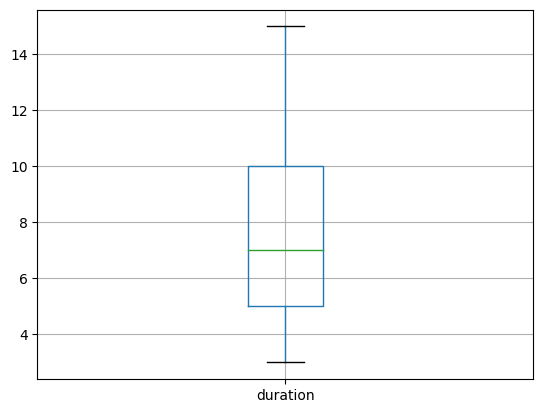

In [37]:
df_pivot.boxplot('duration') # построение диаграммы размаха

Срок жизни платформы в среднем составляет около ~~10~~ 7 лет. Платформа набирает популярность в течение 2-3 лет, пик популярности составляет около 3-4 лет. После чего продажи постепенно снижаются до близких к нулю значений. В 2008 году лидерами продаж были платформы DS, Wii. В 2016 годы наиболее популярны платформы выпущенные в 2013г. 

Таким образом, для дальнейшего исследования будем подробнее рассматривать период с 2013 по 2016гг. Обновим переменную `df_actual`, оставим в ней данные за выбранный период.

In [38]:
df_actual = df_actual.query('year_of_release >= 2013') # срез по дате выпуска игр и запись результата в переменную

In [39]:
# создание сводной таблицы
df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Как мы видим, за обозначенный актуальный период пятерка лидеров продаж несколько изменилась: `PS4`, `PS3`, `XOne`, `3DS`, `X360`.	

<Axes: xlabel='year_of_release'>

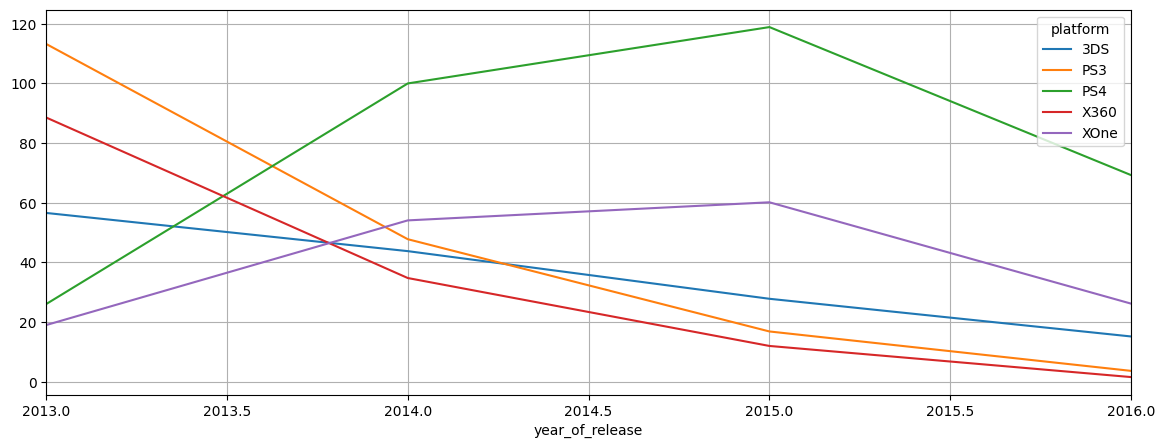

In [40]:
# создание новой таблицы по 5 наиболее популярным платформам после 2013 года
df_actual_top_5 = df_actual[df_actual['platform']
                            .isin(df_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum')
                            .sort_values(by='total_sales', ascending=False).head(5).index)
                           ]
# создание сводной таблицы
ab=df_actual_top_5.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
# построение графика
ab.plot(style='-', xlim=(2013, 2016), figsize=(14, 5), grid=True)

График показал, что наибольшие продажи в 2016 году у платформы `PS4`, а по платформам `PS3`, `X360` продажи стремятся к нулю.

### Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам

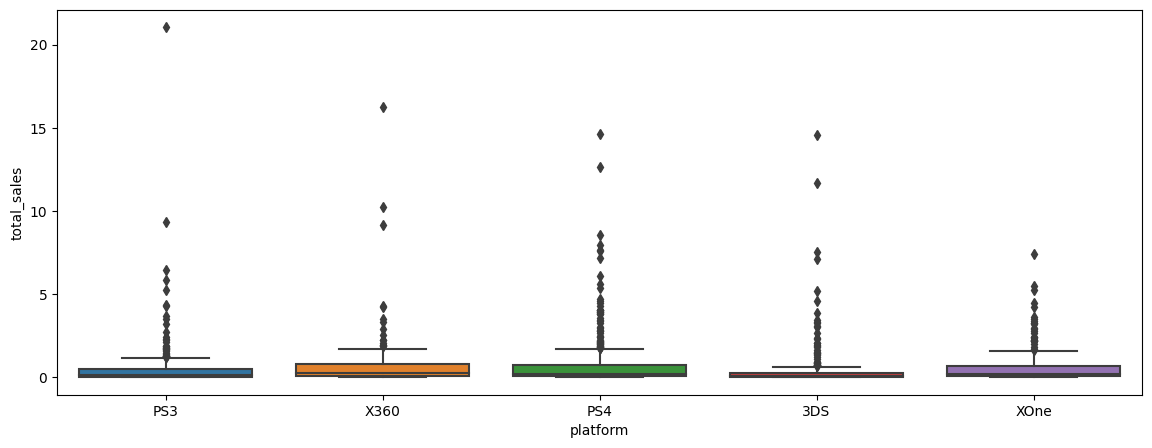

In [41]:
# построение диаграммы размаха
plt.figure(figsize=(14, 5))
(sns.boxplot(data=df_actual_top_5, x='platform', y='total_sales'))
plt.show()

Из за редких выбивающихся значений диаграммы получились слишком сжатыми. 

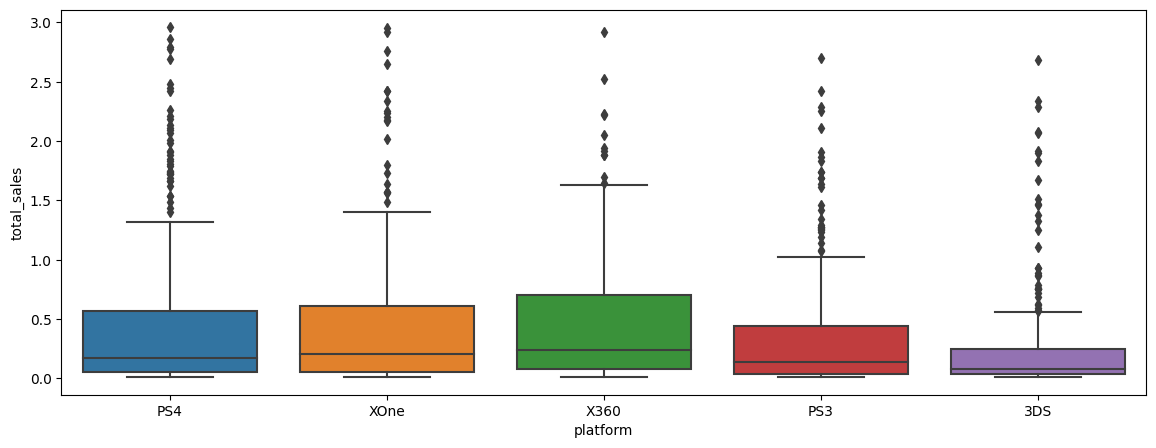

In [42]:
# построение диаграммы размаха
plt.figure(figsize=(14, 5))
(sns.boxplot(data=df_actual_top_5.query('total_sales < 3'), x='platform', y='total_sales'))
plt.show()

Столбец `total_sales` содержит данные о продажах в миллионах копий. Мы видим, что графики сжаты из за выдающихся редких значений. Например на платформе `PS3` максимальное количество продаж одной игры состаляет 21.05 млн. копий. При этом медиана про всем платформам составляет менее полумиллиона копий. Выбросы начинаются в диапазоне от 0,5 до 1,5 млн. копий.

In [43]:
df_actual_top_5.groupby(by='platform')['total_sales'].describe() # получение списка характерных значений

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.090,0.280,14.60
PS3,345.0,0.525884,1.451939,0.01,0.04,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.200,0.730,14.63
X360,186.0,0.735484,1.663275,0.01,0.08,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.06,0.220,0.685,7.39


In [44]:
df_actual_top_5.sort_values(by='total_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013.0,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,no_rating,9.18
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [45]:
df_actual_top_5.groupby(by='platform')['total_sales'].sum()

platform
3DS     143.25
PS3     181.43
PS4     314.14
X360    136.80
XOne    159.32
Name: total_sales, dtype: float64

### Влияние на продажи отзывов пользователей и критиков

#### Платформа 3DS

Чтобы определить зависимоть продаж от отзывов критиков и пользователей, построим для каждого случая диаграмму рассеивания. По оси `х` расположим оценки (критиков/пользователей), по оси `у` - общие продажи.

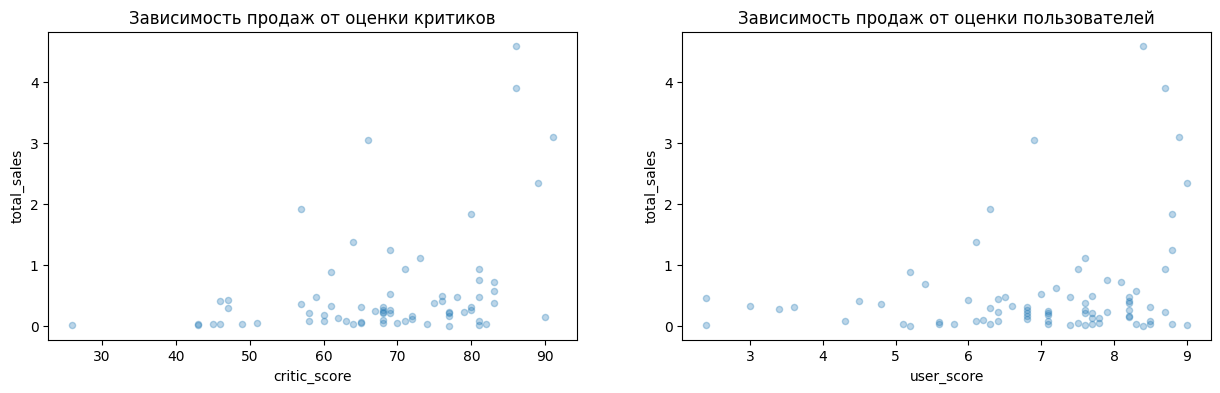

In [46]:
# построение диаграммы рассеяния
fig, axes = plt.subplots(1,2,figsize=(15,4))
df_actual_top_5.query('platform == "3DS"').plot(x='critic_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[0])
df_actual_top_5.query('platform == "3DS"').plot(x='user_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[1] )
axes[0].set_title('Зависимость продаж от оценки критиков')
axes[1].set_title('Зависимость продаж от оценки пользователей')

plt.show()

In [47]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "3DS"')['total_sales'].corr(df_actual_top_5.query('platform == "3DS"')['critic_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.36


In [48]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "3DS"')['total_sales'].corr(df_actual_top_5.query('platform == "3DS"')['user_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.24


Как видно из графиков, не прослеживается завсимость продаж внутри платформы `3DS` от отзывов пользователей и критиков. Это же подтверждается коэффициентом корреляции Пирсона. Значения 0,36 и 0,24 говорят об очень слабой связи, или о ее отсутствии.

#### Платформа PS4

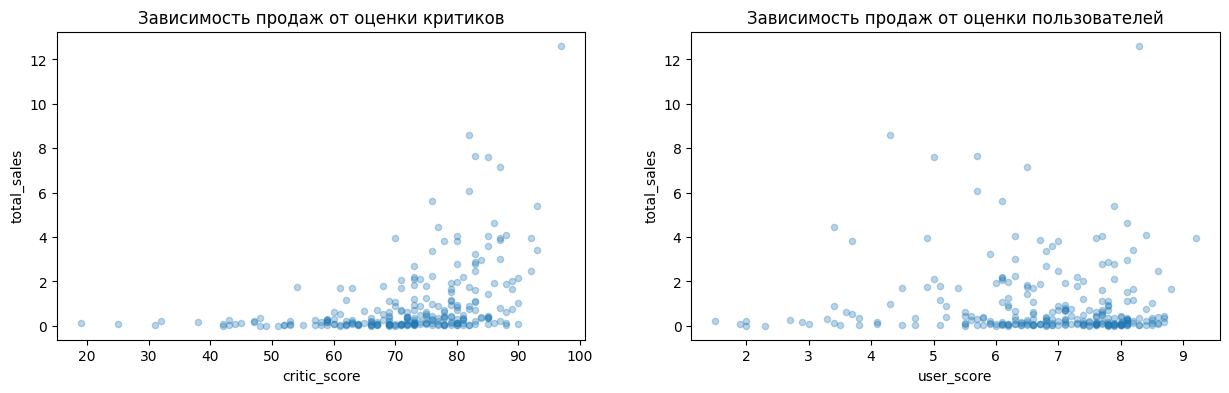

In [49]:
# построение диаграммы рассеяния
fig, axes = plt.subplots(1,2,figsize=(15,4))
df_actual_top_5.query('platform == "PS4"').plot(x='critic_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[0])
df_actual_top_5.query('platform == "PS4"').plot(x='user_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[1] )
axes[0].set_title('Зависимость продаж от оценки критиков')
axes[1].set_title('Зависимость продаж от оценки пользователей')

plt.show()

In [50]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "PS4"')['total_sales'].corr(df_actual_top_5.query('platform == "PS4"')['critic_score'])).round(2)) # рассчет коэффициента корреляции Пирсона
print((df_actual_top_5.query('platform == "PS4"')['total_sales'].corr(df_actual_top_5.query('platform == "PS4"')['user_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.41
-0.03


По платформе `PS4` также не прослеживается прямая связь между продажами и оценкаими критиков и пользователей.

#### Платформа PS3

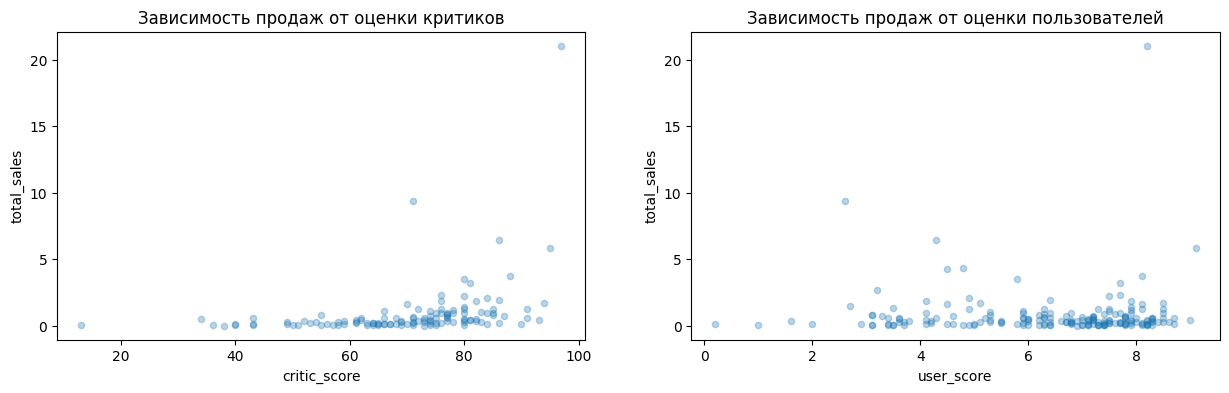

In [51]:
# построение диаграммы рассеяния
fig, axes = plt.subplots(1,2,figsize=(15,4))
df_actual_top_5.query('platform == "PS3"').plot(x='critic_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[0])
df_actual_top_5.query('platform == "PS3"').plot(x='user_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[1] )
axes[0].set_title('Зависимость продаж от оценки критиков')
axes[1].set_title('Зависимость продаж от оценки пользователей')
plt.show()

In [52]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "PS3"')['total_sales'].corr(df_actual_top_5.query('platform == "PS3"')['critic_score'])).round(2)) # рассчет коэффициента корреляции Пирсона
print((df_actual_top_5.query('platform == "PS3"')['total_sales'].corr(df_actual_top_5.query('platform == "PS3"')['user_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.33
0.0


Зависимость продаж от оценки критиков и пользователей не установлена.

####  Платформа X360

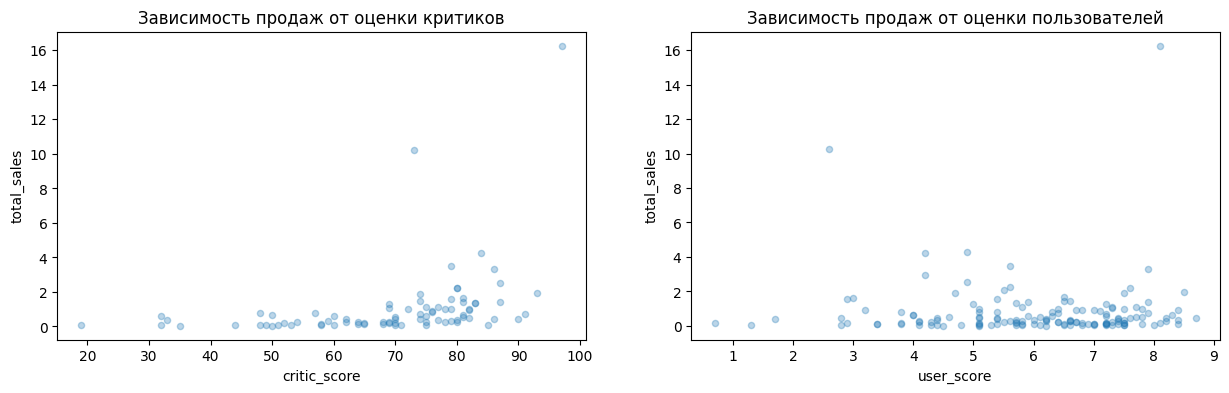

In [53]:
# построение диаграммы рассеяния
fig, axes = plt.subplots(1,2,figsize=(15,4))
df_actual_top_5.query('platform == "X360"').plot(x='critic_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[0])
df_actual_top_5.query('platform == "X360"').plot(x='user_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[1] )
axes[0].set_title('Зависимость продаж от оценки критиков')
axes[1].set_title('Зависимость продаж от оценки пользователей')
plt.show()

In [54]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "X360"')['total_sales'].corr(df_actual_top_5.query('platform == "X360"')['critic_score'])).round(2)) # рассчет коэффициента корреляции Пирсона
print((df_actual_top_5.query('platform == "X360"')['total_sales'].corr(df_actual_top_5.query('platform == "X360"')['user_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.35
-0.01


Зависимость продаж от оценки критиков и пользователей не прослеживается.

####  Платрформа XOne

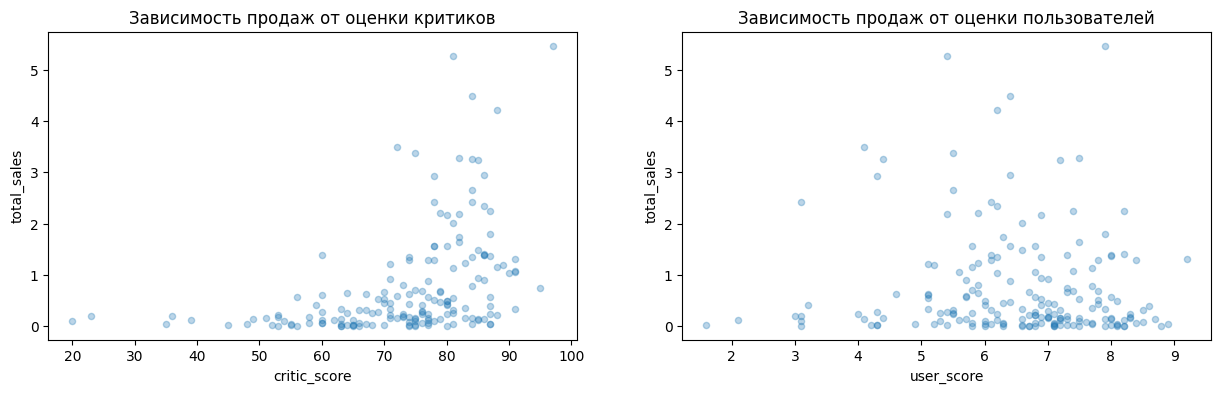

In [55]:
# построение диаграммы рассеяния
fig, axes = plt.subplots(1,2,figsize=(15,4))
df_actual_top_5.query('platform == "XOne"').plot(x='critic_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[0])
df_actual_top_5.query('platform == "XOne"').plot(x='user_score',  y='total_sales', kind='scatter', alpha=0.3, ax=axes[1] )
axes[0].set_title('Зависимость продаж от оценки критиков')
axes[1].set_title('Зависимость продаж от оценки пользователей')
plt.show()

In [56]:
# расчет коэффициентом корреляции Пирсона
print((df_actual_top_5.query('platform == "XOne"')['total_sales'].corr(df_actual_top_5.query('platform == "XOne"')['critic_score'])).round(2)) # рассчет коэффициента корреляции Пирсона
print((df_actual_top_5.query('platform == "XOne"')['total_sales'].corr(df_actual_top_5.query('platform == "XOne"')['user_score'])).round(2)) # рассчет коэффициента корреляции Пирсона

0.42
-0.07


### Общее распределение игр по жанрам

<Axes: xlabel='genre'>

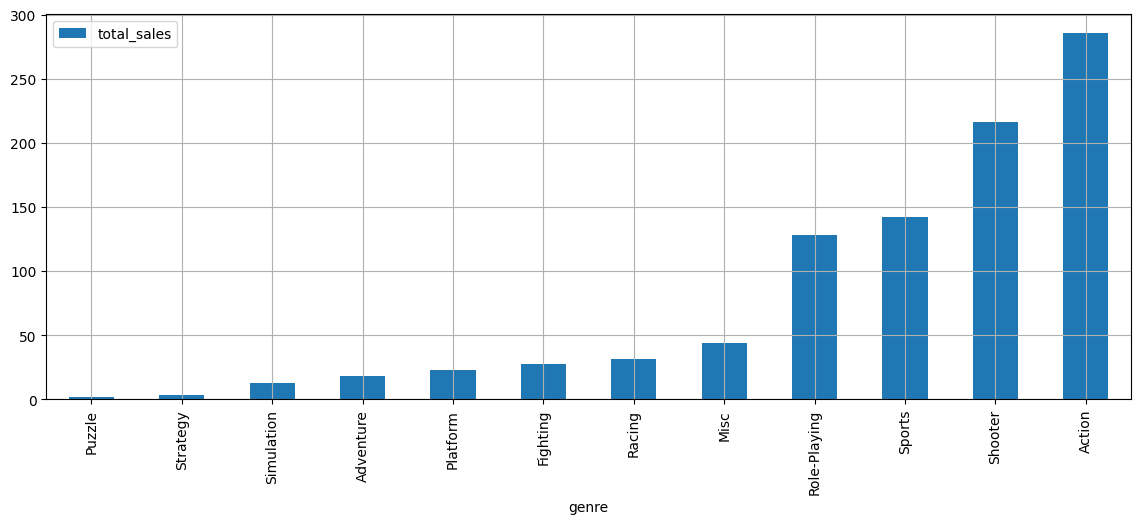

In [57]:
# построение графика на основе сводной таблицы
genre=df_actual_top_5.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales')

genre.plot(kind='bar', xlim=(2001, 2016), figsize=(14, 5), grid=True)

Самыми продаваемыми являются игры жанра экшн, спорт и шутеры. Самыми непопулярными играми оказались стратегии, пазлы и симуляторы.

## Портрет пользователя каждого региона

### Самые популярные платформы

С помощью сводной таблицы определим 5 наиболее прибыльных платформ для каждого региона. Построим круговые диаграммы на основании данных сводных таблиц.

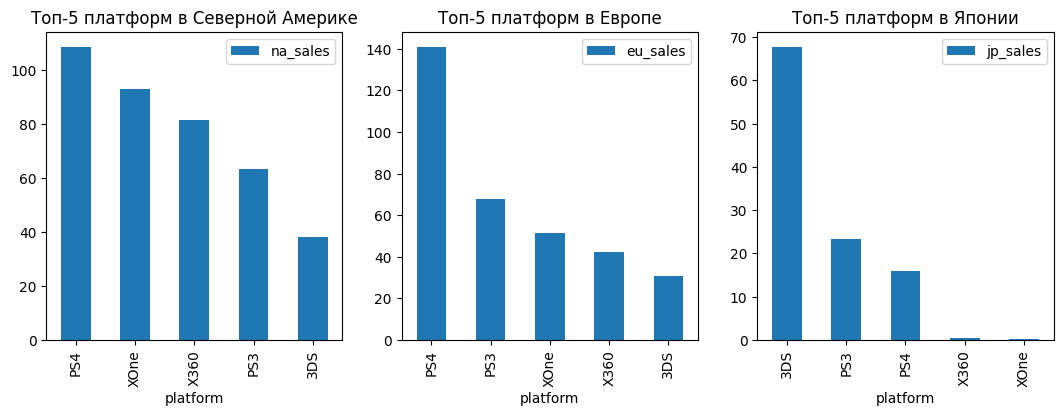

In [58]:
# построение сводных таблиц, сортировка по убыванию продаж, выбор первых 5 значений
na = df_actual_top_5.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

eu = df_actual_top_5.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

jp = df_actual_top_5.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

# построение круговых диаграмм
fig, axes = plt.subplots(1,3, figsize=(13,4))

na.plot(kind='bar', subplots=True, ax=axes[0])
eu.plot(kind='bar', subplots=True, ax=axes[1])
jp.plot(kind='bar', subplots=True, ax=axes[2])

axes[0].set_title("Топ-5 платформ в Северной Америке")
axes[1].set_title("Топ-5 платформ в Европе")
axes[2].set_title("Топ-5 платформ в Японии")
plt.ylabel("")
plt.show()

Самой популярной платформамой в Северной Америке и Европе в период с 2013 по 2016 гг. была `PS4`. В Японии - `3DS`, причем на нее приходилось более половины продаж - 62,8%. Платформы `X360` и `XOne` не популярны в Японии, их продажи составляют менее 1 %.


In [59]:
display(na, eu, jp) # вывод на экран таблиц

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PS4,15.96
X360,0.51
XOne,0.34


### Самые популярные жанры

Для каждого региона построим сводную таблицу, в которой посчитаем продажи по кадому жанру игр, отсортируем по убыванию и отберем по пять жанров с наибольшими продажами. На основании сводных таблиц построим круговые диаграммы, в которых значения продаж будут представлены в процентном соотношении.

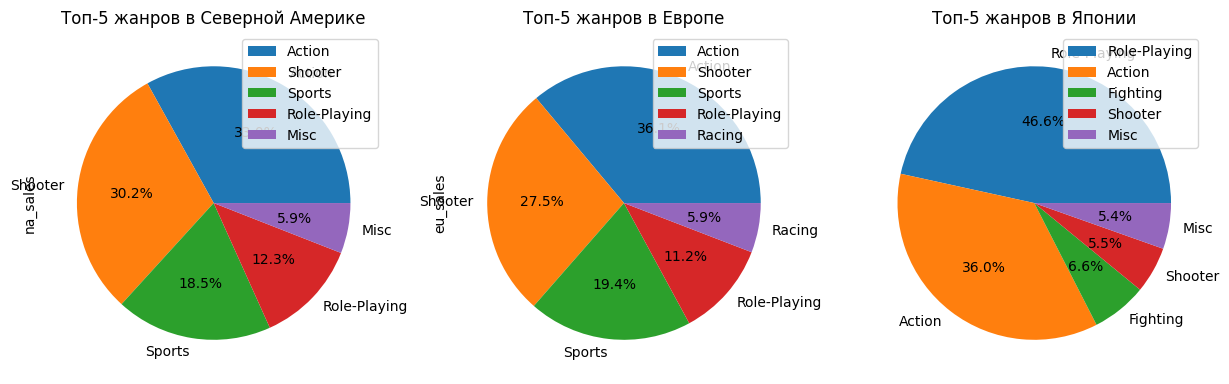

In [60]:
# построение сводных таблиц, сортировка по убыванию продаж, выбор первых 5 значений
na_genre = df_actual_top_5.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

eu_genre = df_actual_top_5.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

jp_genre = df_actual_top_5.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

# построение круговых диаграмм
fig, axes = plt.subplots(1,3, figsize=(15,15))

na_genre.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[0])
eu_genre.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[1])
jp_genre.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[2])

axes[0].set_title("Топ-5 жанров в Северной Америке")
axes[1].set_title("Топ-5 жанров в Европе")
axes[2].set_title("Топ-5 жанров в Японии")
plt.ylabel("")
plt.show()

В Северной Америке и Европе первую тройку лидеров занимают жанры экшн, шутер и спорт. В Японии самый популярный жанр - компютерная ролевая игра. На втором месте - экшн. Спортивные игры не вошли в пятерку лидеров в Японии.

### Влияние рейтинга ESRB на продажи 

Построим круговые диаграммы наиболее популярных рейтингов  ESRB по каждому региону.

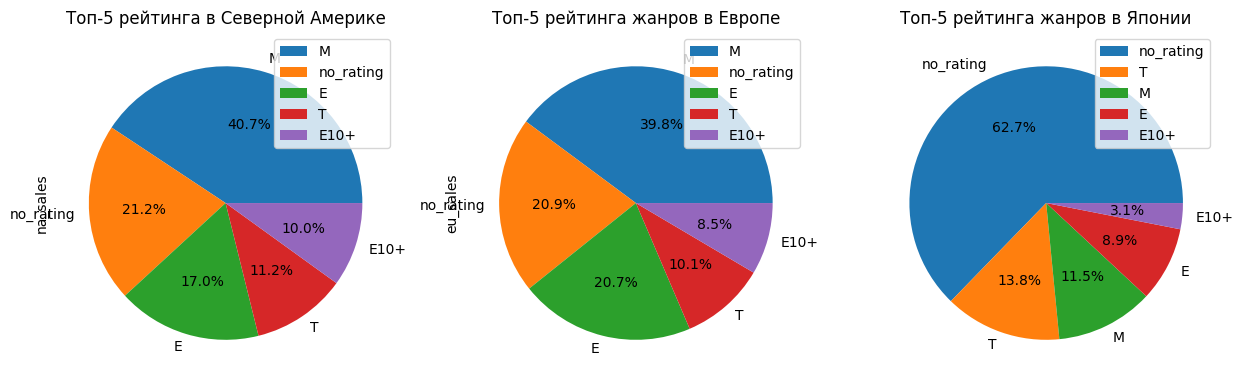

In [61]:
# построение сводных таблиц, сортировка по убыванию продаж, выбор первых 5 значений
na_rating = df_actual_top_5.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head()

eu_rating = df_actual_top_5.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head()

jp_rating = df_actual_top_5.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head()

# построение круговых диаграмм
fig, axes = plt.subplots(1,3, figsize=(15,15))

na_rating.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[0])
eu_rating.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[1])
jp_rating.plot(kind='pie',autopct='%1.1f%%', subplots=True, ax=axes[2])

axes[0].set_title("Топ-5 рейтинга в Северной Америке")
axes[1].set_title("Топ-5 рейтинга жанров в Европе")
axes[2].set_title("Топ-5 рейтинга жанров в Японии")
plt.ylabel("")
plt.show()

В топ вошли следующие рейтинги: `M`, `T`, `E`, `E10+`, а также игры, не имеющие рейтинга. В Японии наиболее популярны игры  без рейтинга (62.7%), в Северной Америке и Европе - игры категории "взрослые".

In [62]:
df_actual_top_5['rating'].value_counts() # подсчет уникальных значений

no_rating    577
M            266
T            236
E            218
E10+         176
Name: rating, dtype: int64

## Проверка гипотез

### Гипотеза №1

**Нулевая гипотеза:** средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.  
**Альтернативная гипотеза:** средние пользовательские рейтинги платформ `Xbox One` и `PC` не равны.

Используя метод `st.ttest_ind` сравним пользовательские рейтинги  платформ Xbox One и PC. Критический уровень статистической значимости зададим значением `0,05`.

In [63]:
df = df.dropna(subset=['user_score']) # удаление пропусков столбца 'user_score'

In [64]:
df['user_score'].isna().sum() # подсчет пропусков

0

In [65]:
alpha = .05
results = st.ttest_ind(
    df.query('platform == "XOne"')['user_score'], 
    df.query('platform == "PC"')['user_score'])
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  1.3896435533548819e-05
Отвергаем нулевую гипотезу


Cредние пользовательские рейтинги платформ `Xbox One` и `PC` не равны.

###  Гипотеза №2

**Нулевая гипотеза:** Средние пользовательские рейтинги жанров `Action`  и `Sports` равны.  
**Альтернативная гипотеза:** Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

In [66]:
alpha = .05
results = st.ttest_ind(
    df.query('genre == "Action"')['user_score'], 
    df.query('genre == "Sports"')['user_score'])
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


Гипотезу не удалось отвергнуть: средние пользовательские рейтинги жанров `Action`  и `Sports` равны.

## Общий вывод

В ходе исследования, для интернет-магазине «Стримчик», был проведен анализ закономерностей, определяющих успешность игры.

Перед тем как приступить к исследованию была произведена предобработка данных:
* исправлен стиль заголовков;
* обработаны пропуски;
* устранены ошибки и аномалии в данных.

Для ответа на гипотезы были посчитаны и добавлены в таблицу следующие данные:
* суммарные продажи во всех регионах.

В ходе исследования было установлено:
1. Срок жизни платформы в среднем составляет около 10 лет. Пик популярности составляет около 3-4 лет.
2. В 2016 году наиболее популярны платформы выпущенные в 2013г: `PS4` и `XOne`, однако их популярность со временем будет снижаться.
3. Прямая зависимость между продажами игр и оценками критиков и пользователей не прослеживается.
4. Наиболее популярны игры жанра экшн, спорт и шутеры. Самые непопулярные - стратегии, пазлы и симуляторы.
5. Портрет пользователя Северной Америки и Европы схож. Япония отличается от этих двух регионов наиболее популярной платформой, жанром и рейтингом игр.

В ходе исследования были проверены 2 гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - гипотеза отвергнута
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные - гипотезу не удалось отвергнуть.



 